In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medicaltranscriptions/mtsamples.csv


In [93]:
df = pd.read_csv('/kaggle/input/medicaltranscriptions/mtsamples.csv')
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [94]:
df.columns

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [96]:
df.size,df.shape

(29994, (4999, 6))

In [97]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [98]:
df.isnull().sum()/df.shape[0]

Unnamed: 0           0.000000
description          0.000000
medical_specialty    0.000000
sample_name          0.000000
transcription        0.006601
keywords             0.213643
dtype: float64

# fillna with mena , median and mode 
1.  mean ( when  dataset column have no outliers
2.  median ( when dataset column have outliers ) => recommeded
3.  mode ( categorical or text ) 

In [99]:
df['transcription'] = df['transcription'].fillna(df['transcription'].mode)
df['keywords'] = df['keywords'].fillna('default')

In [100]:
df.isnull().sum()

Unnamed: 0           0
description          0
medical_specialty    0
sample_name          0
transcription        0
keywords             0
dtype: int64

In [101]:
df.isnull().sum()/df.shape[0]

Unnamed: 0           0.0
description          0.0
medical_specialty    0.0
sample_name          0.0
transcription        0.0
keywords             0.0
dtype: float64

In [122]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [102]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4994    False
4995    False
4996    False
4997    False
4998    False
Length: 4999, dtype: bool

In [103]:
df.duplicated().sum()

0

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.shape,df.size

((4999, 6), 29994)

In [106]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [123]:
df.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [108]:
df['transcription'][0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [109]:
df['description'][0]

' A 23-year-old white female presents with complaint of allergies.'

In [110]:
df['medical_specialty'][0]

' Allergy / Immunology'

In [111]:
df['keywords'][0]

'allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,'

In [112]:
df['sample_name']

0                              Allergic Rhinitis 
1        Laparoscopic Gastric Bypass Consult - 2 
2        Laparoscopic Gastric Bypass Consult - 1 
3                         2-D Echocardiogram - 1 
4                         2-D Echocardiogram - 2 
                          ...                    
4994                           Chronic Sinusitis 
4995        Kawasaki Disease - Discharge Summary 
4996                          Followup on Asthma 
4997                      Asthma in a 5-year-old 
4998                  Allergy Evaluation Consult 
Name: sample_name, Length: 4999, dtype: object

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
sn_count = df['sample_name'].value_counts()
sn_count

sample_name
Lumbar Discogram                           5
Abdominal Pain - Consult                   4
Hypergranulation - Consult                 4
Chest Pain & Respiratory Insufficiency     4
Normal Newborn H&P Template                4
                                          ..
Port-A-Cath Insertion - 4                  1
CT Facial                                  1
Chronic Kidney Disease - Followup          1
Port-A-Cath Insertion - 3                  1
Autopsy - 4                                1
Name: count, Length: 2377, dtype: int64

<Axes: ylabel='sample_name'>

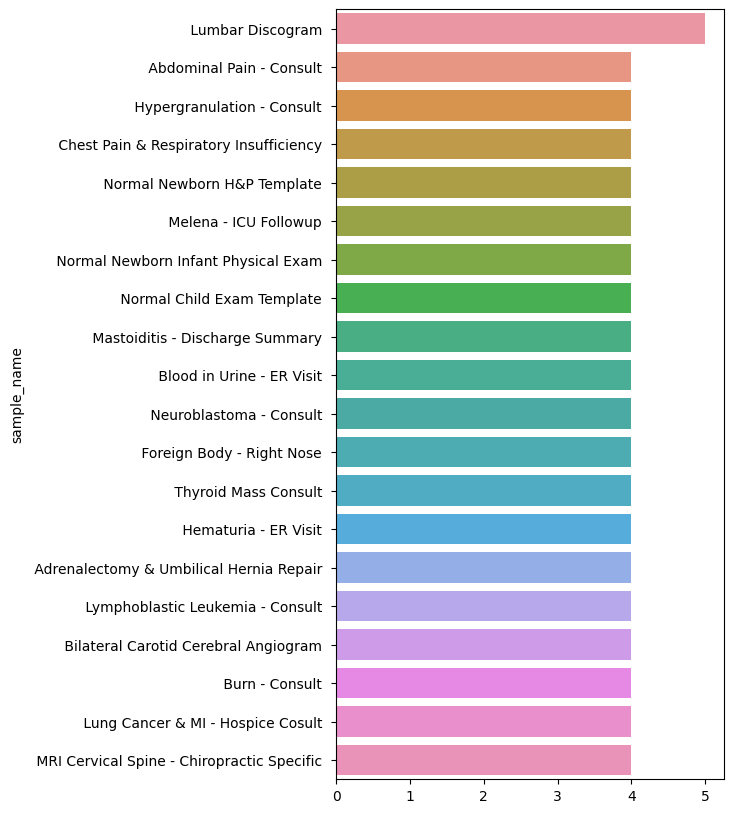

In [163]:
plt.figure(figsize=(5,10))
sns.barplot(y=sn_count.values[:20],x=sn_count.index[:20])

<Axes: xlabel='sample_name'>

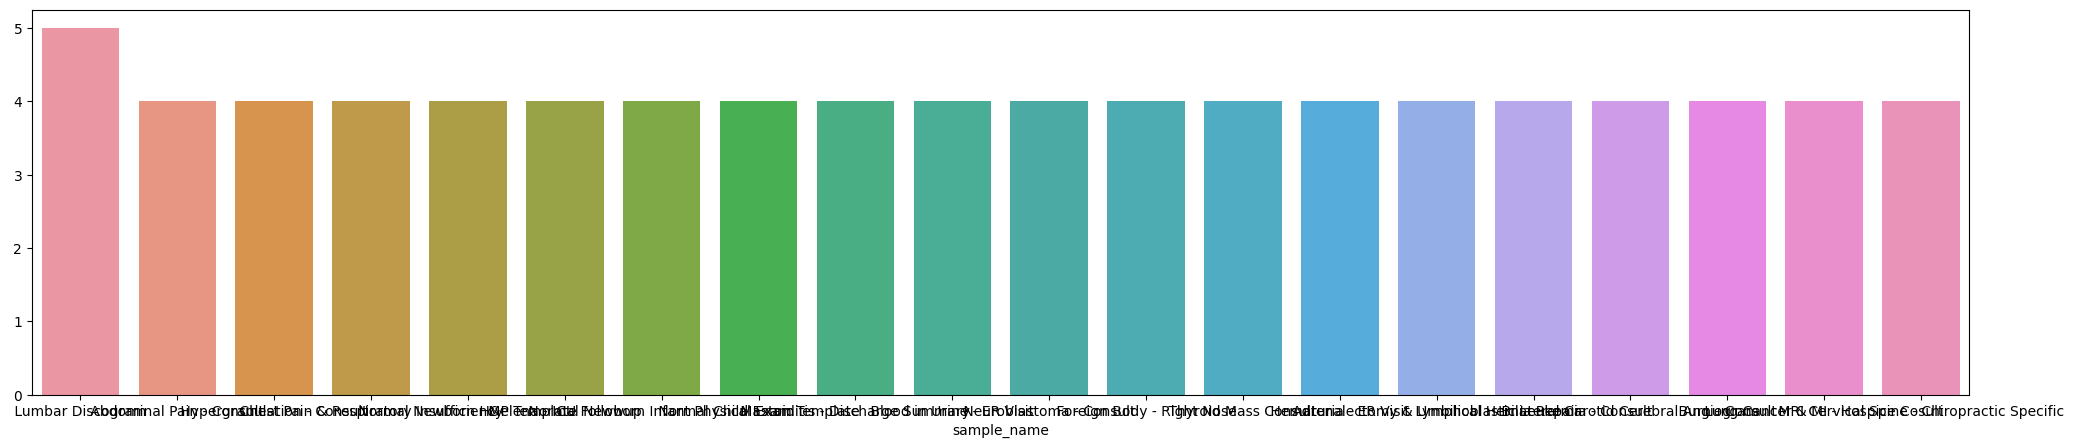

In [166]:
plt.figure(figsize=(25,5))
sns.barplot(x=sn_count.index[:20],y=sn_count.values[:20])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sample_name', ylabel='Count'>

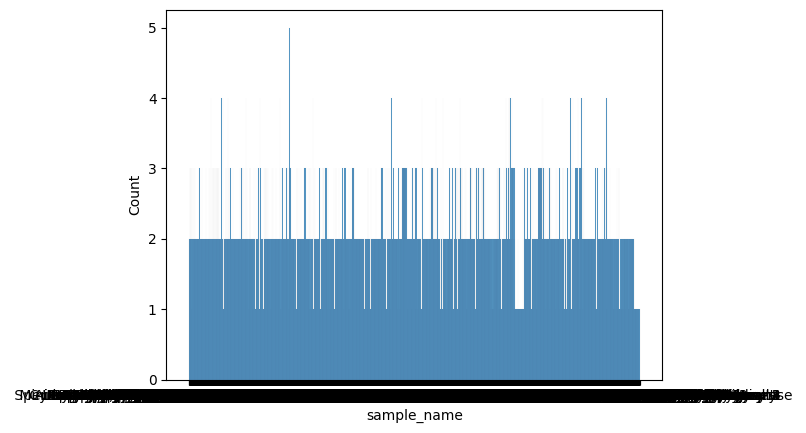

In [128]:
sns.histplot(df['sample_name'])

In [134]:
ms_count = df['medical_specialty'].value_counts()
ms_count

medical_specialty
Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Urology                           158
Discharge Summary                 108
ENT - Otolaryngology               98
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    62
Psychiatry / Psychology            53
Office Notes                       51
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surgery         27
Dentistry                       

<Axes: ylabel='medical_specialty'>

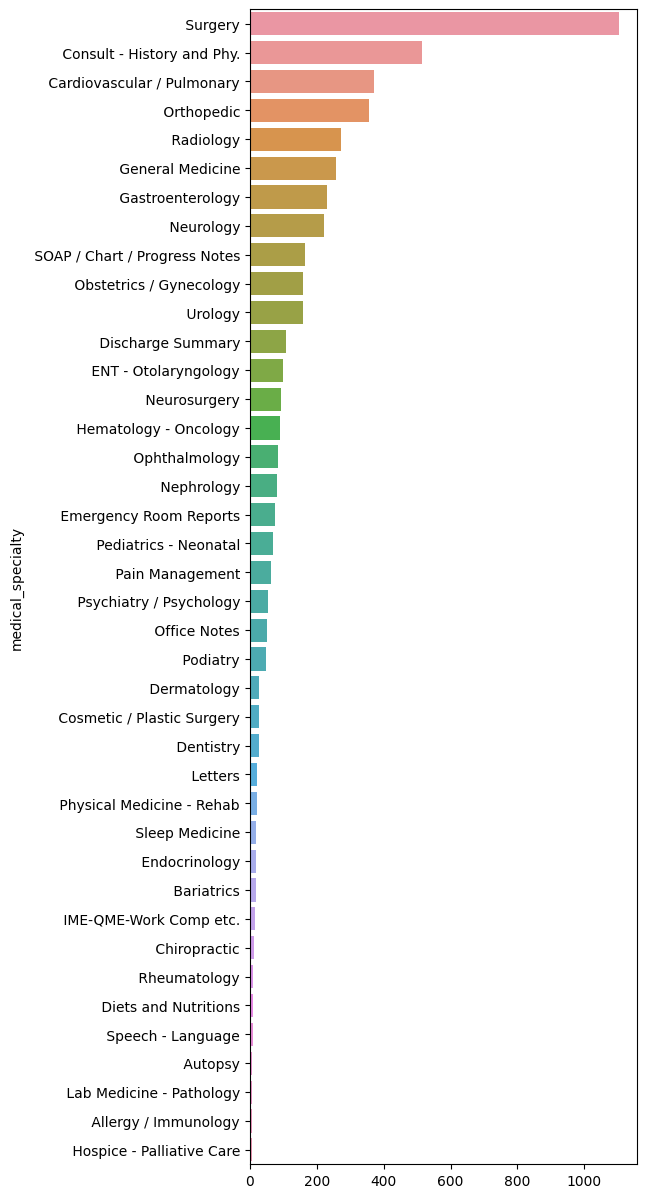

In [140]:
plt.figure(figsize=(5,15))
sns.barplot(x=ms_count.values,y=ms_count.index)

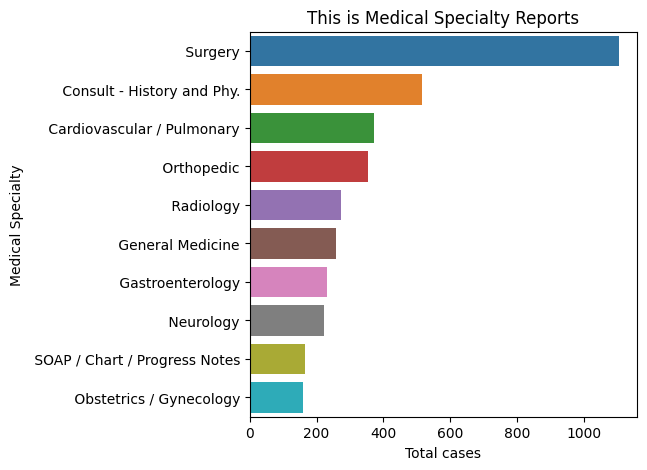

In [159]:
plt.figure(figsize=(5,5))
sns.barplot(x=ms_count.values[:10],y=ms_count.index[:10])
plt.title('This is Medical Specialty Reports')
plt.xlabel('Total cases')
plt.ylabel('Medical Specialty')
plt.show()

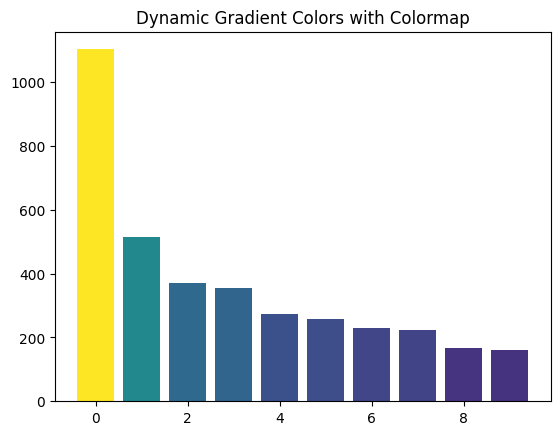

In [149]:
values = ms_count.values[:10]
plt.bar(range(len(values)), values, color=colors)
plt.title("Dynamic Gradient Colors with Colormap")
plt.show()

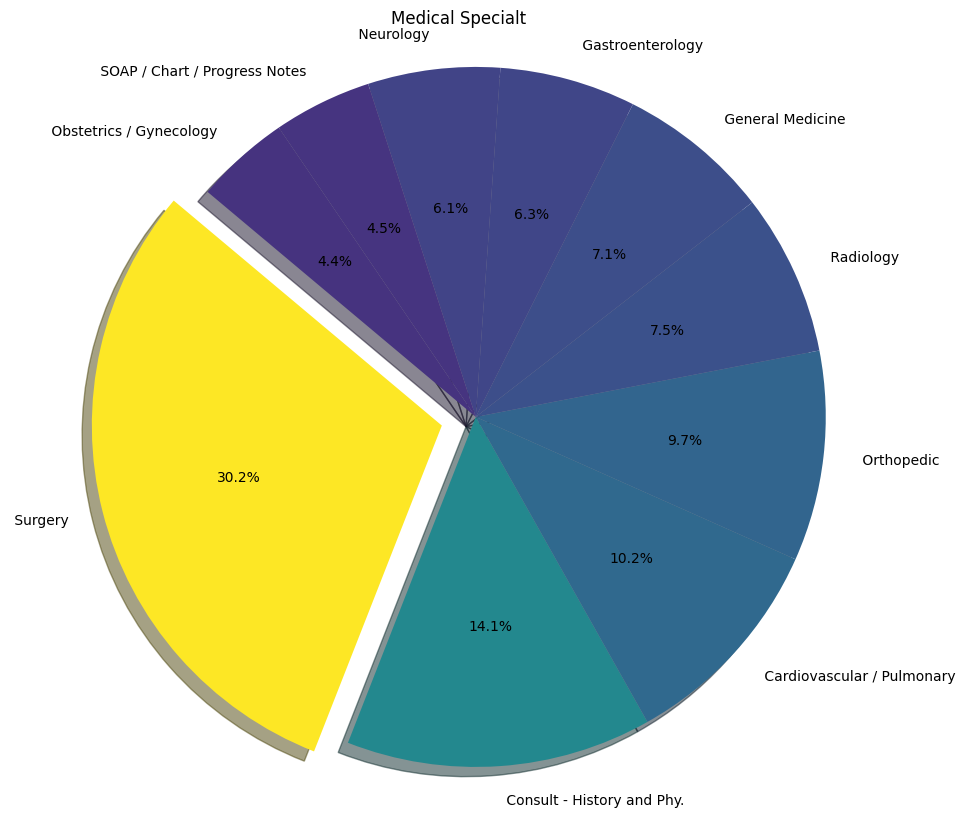

In [153]:
colors = plt.cm.viridis(values / max(values))  # normalize and map


# Dynamically explode the largest value
explode = [0.1 if val == max(values) else 0 for val in values]

# plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
# plt.title("Exploding Largest Slice Dynamically")
# plt.axis('equal')
# plt.show()

plt.figure(figsize=(10, 10))  # Make the figure larger
# Create the pie chart
plt.pie(values, labels=ms_count.index[:10], colors=colors, explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Medical Specialt')
plt.show()

In [115]:
df['keywords'].value_counts()
df['transcription'].value_counts()
df['description'].value_counts()

description
An example/template for a routine normal male physical exam.                                                                          12
Common description of colonoscopy                                                                                                     10
Sample progress note - Gen Med.                                                                                                        8
Sample normal ear, nose, mouth, and throat exam.                                                                                       8
                                                                                                                                       6
                                                                                                                                      ..
Insertion of a Port-A-Catheter via the left subclavian vein approach under fluoroscopic guidance in a patient with ovarian cancer.     1
Insertion of Port-A-Cath via 

In [116]:
des = df.groupby('description').count().reset_index()
des

,description,medical_specialty,sample_name,transcription,keywords
0,,6,6,6,6
1,Antibiotic management for a right foot ulcer...,2,2,2,2
2,CT abdomen without contrast and pelvis witho...,3,3,3,3
3,CT cervical spine for trauma. CT examinatio...,3,3,3,3
4,"Cataract, nuclear sclerotic, right eye. Pha...",2,2,2,2
...,...,...,...,...,...
2343,Worrisome skin lesion. A punch biopsy of the...,2,2,2,2
2344,Wound debridement with removal of Surgisis xe...,1,1,1,1
2345,Wrist de Quervain stenosing tenosynovitis. d...,2,2,2,2
2346,X-RAY of the soft tissues of the neck.,1,1,1,1


In [117]:
ms = df.groupby('medical_specialty').count().reset_index()
ms

,medical_specialty,description,sample_name,transcription,keywords
0,Allergy / Immunology,7,7,7,7
1,Autopsy,8,8,8,8
2,Bariatrics,18,18,18,18
3,Cardiovascular / Pulmonary,372,372,372,372
4,Chiropractic,14,14,14,14
5,Consult - History and Phy.,516,516,516,516
6,Cosmetic / Plastic Surgery,27,27,27,27
7,Dentistry,27,27,27,27
8,Dermatology,29,29,29,29
9,Diets and Nutritions,10,10,10,10


In [118]:
k = df.groupby('keywords').count().reset_index()
k

,keywords,description,medical_specialty,sample_name,transcription
0,,81,81,81,81
1,"allergy / immunology, allergic rhinitis, aller...",1,1,1,1
2,"allergy / immunology, chronic glossitis, xeros...",1,1,1,1
3,"allergy / immunology, mucous membranes, conjun...",1,1,1,1
4,"bariatrics, breast reconstruction, excess, lma...",1,1,1,1
...,...,...,...,...,...
3845,"urology, urinary retention, transurethral rese...",1,1,1,1
3846,"urology, urinary tract infection, escherichia ...",1,1,1,1
3847,"urology, vas, contralateral, desire for steril...",1,1,1,1
3848,"urology, vasectomy, allis clamp, catgut, hemoc...",1,1,1,1


In [119]:
sn = df.groupby('sample_name').count().reset_index()
sn

,sample_name,description,medical_specialty,transcription,keywords
0,1-year-old Exam - H&P,1,1,1,1
1,2-D Doppler,2,2,2,2
2,2-D Echocardiogram - 1,2,2,2,2
3,2-D Echocardiogram - 2,2,2,2,2
4,2-D Echocardiogram - 3,2,2,2,2
...,...,...,...,...,...
2372,YAG Laser Capsulotomy - 1,2,2,2,2
2373,Youngswick Bunionectomy,2,2,2,2
2374,Youngswick Osteotomy,2,2,2,2
2375,de Quervain Release - Carpal,2,2,2,2


In [120]:
t = df.groupby('transcription').count().reset_index()
t

,transcription,description,medical_specialty,sample_name,keywords
0,<bound method Series.mode of 0 SUBJECTIV...,33,33,33,33
1,"1. Odynophagia.,2. Dysphagia.,3. Gastroesop...",2,2,2,2
2,"1. Pelvic tumor.,2. Cystocele.,3. Rectocele...",3,3,3,3
3,1. The left ventricular cavity size and wall ...,2,2,2,2
4,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",2,2,2,2
...,...,...,...,...,...
2353,"XYZ, O.D.,RE: ABC,DOB: MM/DD/YYYY,Dear Dr. X...",2,2,2,2
2354,"XYZ, O.D.,RE: ABC,DOB: MM/DD/YYYY,Dear XYZ:,...",2,2,2,2
2355,"XYZ, S.,RE: ABC,Dear Dr. XYZ,On your kind ref...",2,2,2,2
2356,"XYZ,RE: ABC,MEDICAL RECORD#: 123,Dear Dr. XY...",3,3,3,3


# Feature Engineering 

In [167]:
df.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [172]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,description_len,ms_len,sn_len
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",65,21,19
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",41,11,41
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",41,11,41
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",23,27,24
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",19,27,24


In [168]:
df['description_len']= df['description'].apply(len)

In [173]:
df['ms_len']= df['medical_specialty'].apply(len)
df['sn_len']= df['sample_name'].apply(len)

In [178]:
# df['t_len']= df['transcription'].apply(len)
df['t_len'] = df['transcription'].apply(lambda x: len(str(x)) if x is not None else 0)


In [175]:

df['k_len']= df['keywords'].apply(len)

In [179]:
df

,description,medical_specialty,sample_name,transcription,keywords,description_len,ms_len,sn_len,k_len,t_len
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",65,21,19,131,1331
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",41,11,41,232,2431
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",41,11,41,235,4422
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",23,27,24,255,495
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",19,27,24,327,1618
...,...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",default,143,21,19,7,5338
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun...",261,21,38,105,1566
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",default,81,21,20,7,4543
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",default,49,21,24,7,2781


In [181]:
new_= df.iloc[:,5:]
new_

,description_len,ms_len,sn_len,k_len,t_len
0,65,21,19,131,1331
1,41,11,41,232,2431
2,41,11,41,235,4422
3,23,27,24,255,495
4,19,27,24,327,1618
...,...,...,...,...,...
4994,143,21,19,7,5338
4995,261,21,38,105,1566
4996,81,21,20,7,4543
4997,49,21,24,7,2781


In [182]:
new_.describe()

,description_len,ms_len,sn_len,k_len,t_len
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,132.440688,16.082016,27.414283,180.815363,3036.891578
std,80.360019,7.641298,9.048699,162.081329,1996.474689
min,1.000000,8.000000,5.000000,1.000000,11.000000
25%,68.500000,8.000000,21.000000,79.000000,1590.500000
50%,117.000000,13.000000,27.000000,163.000000,2659.000000
75%,181.000000,24.000000,33.000000,238.000000,3995.000000
max,492.000000,30.000000,69.000000,916.000000,18425.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ms_len', ylabel='Count'>

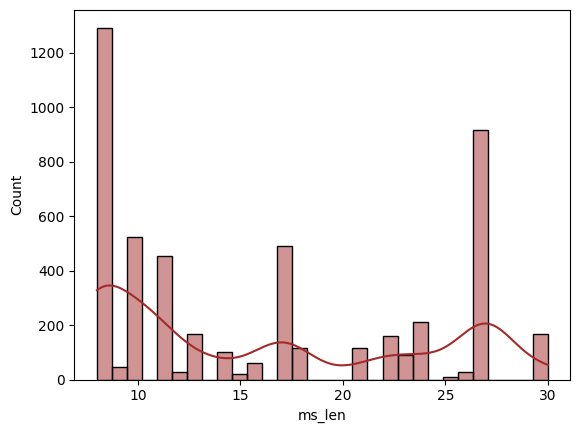

In [187]:
sns.histplot(new_['ms_len'],kde=True,color='brown',bins=30)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sn_len', ylabel='Count'>

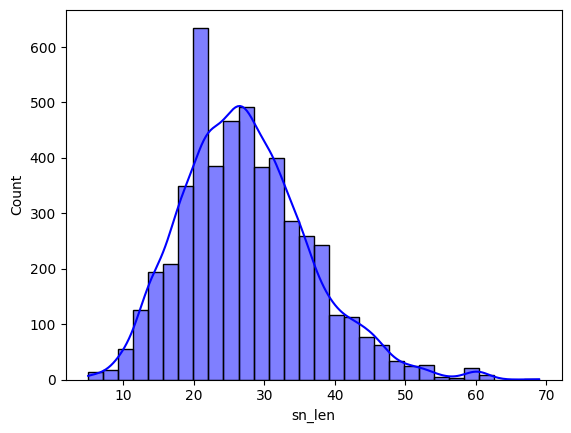

In [188]:
sns.histplot(new_['sn_len'],kde=True,color='blue',bins=30)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t_len', ylabel='Count'>

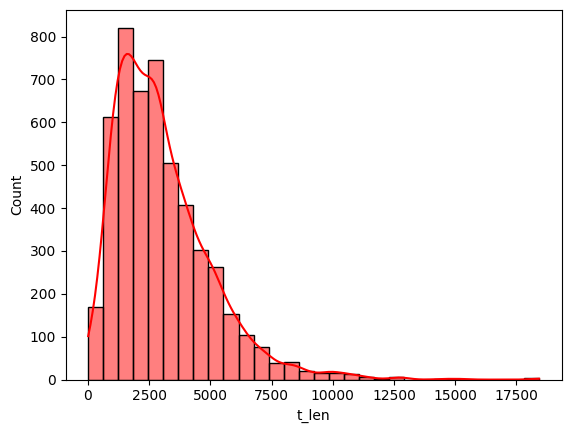

In [190]:
sns.histplot(new_['t_len'],kde=True,color='red',bins=30)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='k_len', ylabel='Count'>

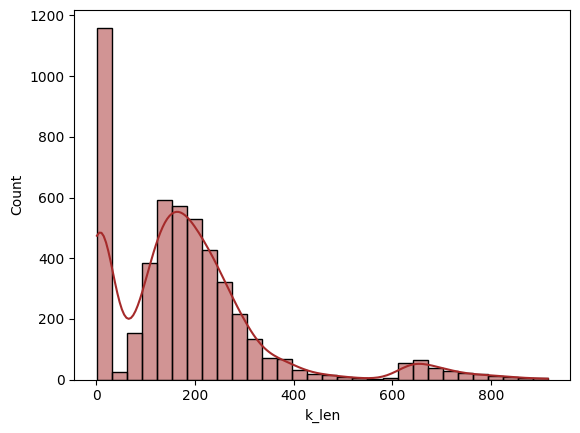

In [192]:
sns.histplot(new_['k_len'],kde=True,color='brown',bins=30)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='description_len', ylabel='Count'>

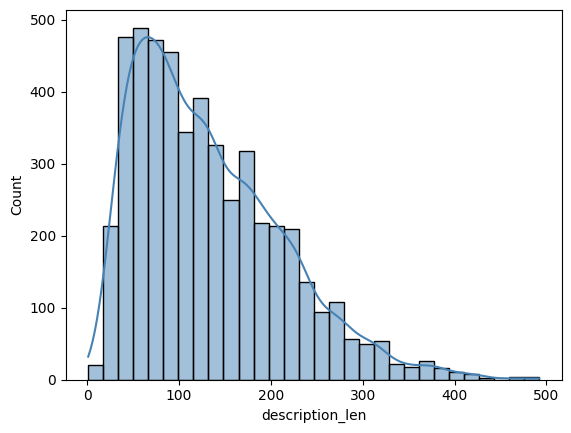

In [184]:
sns.histplot(new_['description_len'],kde=True,color='steelblue',bins=30)